In [63]:
# Data and Data Structures
import json
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from subprocess import check_output

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.decomposition import LatentDirichletAllocation

%matplotlib inline
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
plt.style.use('bmh')
from wordcloud import WordCloud, STOPWORDS

In [64]:
# Load Train Data
train = pd.read_json("train.json")

# Load Test Data
test = pd.read_json("test.json")


print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (4040, 32)
Test Shape: (1631, 17)


In [65]:
train

,giver_username_if_known,number_of_downvotes_of_request_at_retrieval,number_of_upvotes_of_request_at_retrieval,post_was_edited,request_id,request_number_of_comments_at_retrieval,request_text,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,...,requester_received_pizza,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_minus_downvotes_at_retrieval,requester_upvotes_plus_downvotes_at_request,requester_upvotes_plus_downvotes_at_retrieval,requester_user_flair,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,0,1,0,t3_l25d7,0,Hi I am in need of food for my 4 children we a...,Hi I am in need of food for my 4 children we a...,Request Colorado Springs Help Us Please,0.000000,...,False,[],0,1,0,1,None,nickylvst,1317852607,1317849007
1,N/A,2,5,0,t3_rcb83,0,I spent the last money I had on gas today. Im ...,I spent the last money I had on gas today. Im ...,"[Request] California, No cash and I could use ...",501.111100,...,False,"[AskReddit, Eve, IAmA, MontereyBay, RandomKind...",34,4258,116,11168,None,fohacidal,1332652424,1332648824
2,N/A,0,3,0,t3_lpu5j,0,My girlfriend decided it would be a good idea ...,My girlfriend decided it would be a good idea ...,"[Request] Hungry couple in Dundee, Scotland wo...",0.000000,...,False,[],0,3,0,3,None,jacquibatman7,1319650094,1319646494
3,N/A,0,1,1,t3_mxvj3,4,"It's cold, I'n hungry, and to be completely ho...","It's cold, I'n hungry, and to be completely ho...","[Request] In Canada (Ontario), just got home f...",6.518438,...,False,"[AskReddit, DJs, IAmA, Random_Acts_Of_Pizza]",54,59,76,81,None,4on_the_floor,1322855434,1322855434
4,N/A,6,6,0,t3_1i6486,5,hey guys:\n I love this sub. I think it's grea...,hey guys:\n I love this sub. I think it's grea...,[Request] Old friend coming to visit. Would LO...,162.063252,...,False,"[GayBrosWeightLoss, RandomActsOfCookies, Rando...",1121,1225,1733,1887,None,Futuredogwalker,1373657691,1373654091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4035,N/A,3,5,0,t3_1hpv57,1,Is anyone out there kind enough to help me out...,Is anyone out there kind enough to help me out...,[REQUEST] Anyone help a recent college grad wh...,0.000000,...,False,[],0,4,0,12,None,bstewart88,1373068818,1373065218
4036,N/A,2,5,0,t3_1lzcwr,0,If someone could hook me up with a $15 gift ca...,If someone could hook me up with a $15 gift ca...,[Request][USA] Papa Johns is giving away one f...,658.366863,...,True,"[AskReddit, CoffeeWithJesus, IAmA, RandomKindn...",738,751,2974,3025,shroom,puddems,1378667174,1378663574
4037,N/A,4,10,1369770892,t3_1f77ml,2,"Have today off, soo I'll be stuck in the house...","Have today off, soo I'll be stuck in the house...","[REQUEST][MI,USA] Day off, would love pizza fo...",410.551736,...,False,"[AdviceAnimals, Android, AskReddit, Diablo, HT...",1252,1327,5634,5761,None,Candlejac88,1369754714,1369751114
4038,N/A,2,7,0,t3_q875f,4,"I've never done anything like this before, but...","I've never done anything like this before, but...",[Request] Nashua Nh Mother of one hungry 2 yea...,0.000000,...,False,[Random_Acts_Of_Pizza],5,13,7,41,None,nhcollegechic,1330357920,1330357920


In [66]:
test

,giver_username_if_known,request_id,request_text_edit_aware,request_title,requester_account_age_in_days_at_request,requester_days_since_first_post_on_raop_at_request,requester_number_of_comments_at_request,requester_number_of_comments_in_raop_at_request,requester_number_of_posts_at_request,requester_number_of_posts_on_raop_at_request,requester_number_of_subreddits_at_request,requester_subreddits_at_request,requester_upvotes_minus_downvotes_at_request,requester_upvotes_plus_downvotes_at_request,requester_username,unix_timestamp_of_request,unix_timestamp_of_request_utc
0,N/A,t3_i8iy4,Hey all! It's about 95 degrees here and our ki...,[request] pregger gf 95 degree house and no fo...,42.083866,0.0,57,0,10,0,16,"[AskReddit, COents, Denver, DenverBroncos, Lib...",364,840,j_like,1308963419,1308959819
1,N/A,t3_1mfqi0,I didn't know a place like this exists! \n\nI ...,"[Request] Lost my job day after labour day, st...",223.784537,0.0,145,0,36,0,29,"[Android, AskReddit, GrandTheftAutoV, IAmA, Mi...",516,1448,0110110101101100,1379263523,1379259923
2,N/A,t3_lclka,Hi Reddit. Im a single dad having a really rou...,(Request) pizza for my kids please?,0.000000,0.0,0,0,0,0,0,[],0,0,singledad22601,1318636421,1318632821
3,N/A,t3_1jdgdj,Hi I just moved to Waltham MA from my home sta...,[Request] Just moved to a new state(Waltham MA...,481.311273,0.0,277,0,17,0,30,"[AdviceAnimals, Art, AskReddit, GetMotivated, ...",1058,2062,Neuronut,1375220282,1375216682
4,N/A,t3_t2qt4,We're just sitting here near indianapolis on o...,"[Request] Two girls in between paychecks, we'v...",0.000000,0.0,0,0,0,0,0,[],0,0,so_damn_hungry,1335934358,1335930758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626,N/A,t3_knttk,"About two months ago, myself and three friends...",[Request] Guy in the Cabin,240.632060,0.0,21,0,7,0,11,"[AskReddit, Austria, IAmA, gameofthrones, game...",687,2079,post91,1316697470,1316693870
1627,crakhed,t3_11wza2,I just spent $75 dollars paying to get my appl...,[Request] California USA Last of my money wen...,49.641481,0.0,92,0,5,0,13,"[AskReddit, AskWomen, IAmA, LetsNotMeet, Modes...",2094,2876,AccioNeedles,1350957149,1350953549
1628,N/A,t3_iwbsf,"I live in Monterrey Mexico, yup the city of Na...","[Request] MONTERREY, I'm hungry :( I hope we M...",105.348530,0.0,261,0,30,0,22,"[AskReddit, IAmA, Monterrey, ads, beermoney, b...",1109,6689,ivanbco,1311296237,1311292637
1629,N/A,t3_nys7g,"I am 23, have been in the service industry for...","[REQUEST] A bit hungover, broke (even though I...",20.693403,0.0,8,0,1,0,5,"[AskReddit, Austin, DoesAnybodyElse, IAmA, Ran...",16,24,table95,1325444789,1325444789


Test dataset is missing a lot of columns, need to filter the train dataset

In [67]:
test.columns

Index(['giver_username_if_known', 'request_id', 'request_text_edit_aware',
       'request_title', 'requester_account_age_in_days_at_request',
       'requester_days_since_first_post_on_raop_at_request',
       'requester_number_of_comments_at_request',
       'requester_number_of_comments_in_raop_at_request',
       'requester_number_of_posts_at_request',
       'requester_number_of_posts_on_raop_at_request',
       'requester_number_of_subreddits_at_request',
       'requester_subreddits_at_request',
       'requester_upvotes_minus_downvotes_at_request',
       'requester_upvotes_plus_downvotes_at_request', 'requester_username',
       'unix_timestamp_of_request', 'unix_timestamp_of_request_utc'],
      dtype='object')

In [68]:
train_filter = train[test.columns]

In [69]:
train_filter.shape

(4040, 17)

In [70]:
labels = train[['requester_received_pizza']]

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


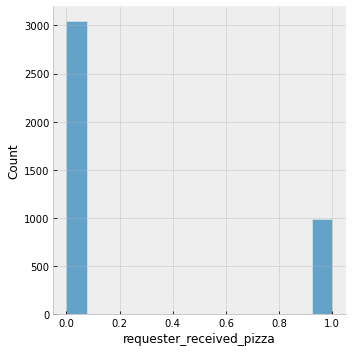

In [71]:
sns.displot(x = labels.requester_received_pizza)

In [72]:
# Isolate the text column for the training and dev dataframes
x_train, x_test, y_train, y_test = train_test_split(
   train_filter,
   labels, test_size=0.3, random_state=0)

print("Our Train Shape:", x_train.shape)
print("Our Test Shape:", x_test.shape)

Our Train Shape: (2828, 17)
Our Test Shape: (1212, 17)


In [73]:
# Create Sparse matrix of words
count_vect = CountVectorizer()

# Apply to train and test data
x_trainNB = count_vect.fit_transform(x_train['request_text_edit_aware'])
x_testNB = count_vect.transform(x_test['request_text_edit_aware'])

# Print the first and last five words
cv_feature_names = count_vect.get_feature_names()
print("First five words:")
print(cv_feature_names[:5])
print("Last five words:")
print(cv_feature_names[-5:])

First five words:
['00', '000', '0000', '0011011001111000', '00pm']
Last five words:
['zrssbvz', 'zsk5c3o', 'zucchini', 'zuuri', 'zza']


In [74]:
# All parameters not specified are set to their defaults
nb = BernoulliNB()
nb.fit(x_trainNB, y_train)
predictions = nb.predict(x_testNB)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

       False       0.78      0.85      0.81       921
        True       0.34      0.24      0.28       291

    accuracy                           0.70      1212
   macro avg       0.56      0.55      0.55      1212
weighted avg       0.67      0.70      0.69      1212



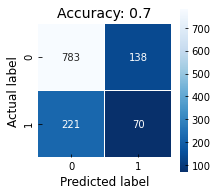

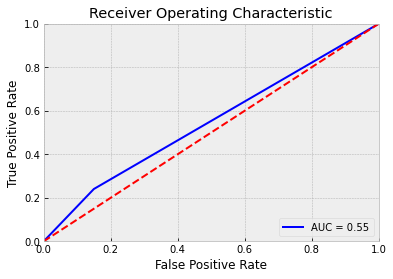

In [75]:

"""
Output: Classification report, confusion matrix, and ROC curve
"""
print(classification_report(y_test, predictions))


cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy: {0}'.format(round(metrics.accuracy_score(y_test, predictions),2))
plt.title(all_sample_title, size = 14)
plt.show()

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [76]:
y_test

,requester_received_pizza
927,False
217,True
773,True
1544,True
2690,False
...,...
3253,False
3377,False
2700,False
1256,False


In [46]:
predictions

array([False, False, False, ..., False,  True, False])